# Lecture 2: Time Integration Methods
In this lecture, we will explore different time integration methods for simulating the motion of a particle in a constant electromagnetic field.

Time integration methods are numerical techniques used to approximate the solutions of ordinary differential equations (ODEs) over a sequence of discrete time steps. These methods play a crucial role in simulating dynamic systems and physical processes that evolve over time. In the context of computational electromagnetics and plasma physics, time integration is essential for accurately modeling the interactions between electromagnetic fields and charged particles.

# Explicit and Implicit Numerical Integration Schemes

Numerical integration schemes are essential tools in computational physics for approximating the solutions of ordinary differential equations (ODEs) and simulating the behavior of dynamical systems. Two main categories of numerical integration schemes are explicit and implicit methods, each with its own advantages and considerations.

## Explicit

In an explicit numerical integration scheme, the solution at the next time step is computed explicitly using the information from the current time step. One of the simplest explicit methods is Euler's method. Given an ODE $\frac{dy}{dt} = f(t, y)$ and an initial condition $y(t_0) = y_0$, the explicit Euler's method updates the solution as:

$$
y_{n+1} = y_n + \Delta t \cdot f(t_n, y_n)
$$

Explicit methods are generally easy to implement and computationally efficient. However, they may have limitations in terms of stability and accuracy, especially for stiff or oscillatory systems.

## Implicit

In an implicit numerical integration scheme, the solution at the next time step is obtained by solving an equation that involves both the current and future values of the solution. This often requires iterative methods to find the solution. One common implicit method is the backward Euler method. Given the same ODE and initial condition, the backward Euler's method updates the solution as:

$$
y_{n+1} = y_n + \Delta t \cdot f(t_{n+1}, y_{n+1})
$$

Implicit methods are more stable than explicit methods and can handle stiff systems more effectively. They are particularly useful when the time step needs to be large or when dealing with complex systems.

## Comparison and Considerations

Explicit methods are generally easier to implement and compute, but they may require smaller time steps for stability. Implicit methods offer better stability and accuracy but involve solving nonlinear equations at each time step, which can be computationally expensive.

The choice between explicit and implicit methods depends on the specific characteristics of the problem at hand, including stability requirements, desired accuracy, and computational resources.

# Example: Lorentz Equation

As an illustrative example for applying time integration methods, let's consider the Lorentz equation, which describes the motion of a charged particle in an electromagnetic field. The Lorentz equation can be written as follows:

$$
\frac{d\mathbf{v}}{dt} = \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right)
$$

where:
- $\mathbf{v}$ is the velocity vector of the particle,
- $\mathbf{E}$ is the electric field vector,
- $\mathbf{B}$ is the magnetic field vector,
- $q$ is the charge of the particle,
- $m$ is the mass of the particle.


To discretize this equation, we'll use a time step $\Delta t$ and update the particle's velocity and position as follows:

$$
\Delta \mathbf{v} = \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right) \cdot \Delta t
$$

$$
\Delta \mathbf{x} = \mathbf{v} \cdot \Delta t
$$

In this example, we'll use the Lorentz equation to simulate the motion of a charged particle in a constant electromagnetic field using various time integration methods that we've discussed.

To begin, we'll need to define the initial conditions, such as the particle's initial position, velocity, charge, mass, and the components of the electric and magnetic fields. We'll then apply the chosen time integration methods to update the particle's velocity and position over a sequence of discrete time steps. The resulting trajectory of the particle will provide insights into its motion under the influence of the electromagnetic field.

Show that in a constant cross field $\mathbf{E} = (0,E,0)$ and $\mathbf{B} = (0,0,B)$ that particle path obeys the following parametric equations

$$
x(t) = R (\omega t - \sin \omega t)
$$

$$
y(t) = R (1- \cos \omega t)
$$

where $\omega = \frac{qB}{m}$ and $R = \frac{m E}{q B^2}$.

<div style="text-align:center">
    <figure>
        <img src="cycloid.gif" alt="cycloid" style="width: 1000;">
        <figcaption>Fig.1 Cycloid Motion</figcaption>
    </figure>
</div>

## Euler's First-Order Scheme

Euler's method is a simple and straightforward time integration technique. Given an initial state $(x_0, y_0)$ and an ordinary differential equation $\frac{dx}{dt} = f(x, y)$ and $\frac{dy}{dt} = g(x, y)$, the Euler's method updates the state at each time step using the following formula:

$$
x_{i+1} = x_i + f(x_i, y_i) \cdot \Delta t
$$
$$
y_{i+1} = y_i + g(x_i, y_i) \cdot \Delta t
$$

where $\Delta t$ is the time step size, and $f(x, y)$ and $g(x, y)$ are the functions defining the derivatives in the x and y directions, respectively.

<div style="text-align:center">
    <figure>
        <img src="euler.svg" alt="Euler's Method" style="width: 400px;background-color: #EEE;">
        <figcaption>Fig.2 Euler's Method</figcaption>
    </figure>
</div>

### Implementation
Let's implement Euler's first-order scheme for simulating the projectile motion in a constant electromagnetic field.

In [1]:
# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees
c=1
m=1

# field parameters
E = 1
B = 1

# Time step size for the simulation
dt = 0.01  # seconds

tmax=300

# Number of time steps to simulate
num_steps = int(tmax/dt)

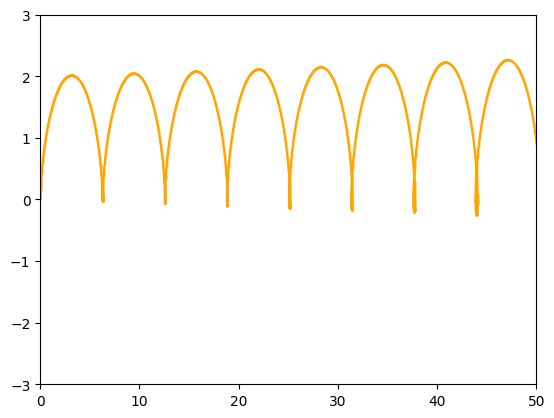

In [2]:
import numpy as np

def acceleration_function(vx_euler, vy_euler, E, B, c, m, i) :
    ax= (c/m)*(vy_euler[i - 1]*B)
    ay= (c/m)*(E-(vx_euler[i - 1]*B))
    
    return ax,ay    

# Implement Euler's first-order scheme
def euler_method_forward(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)
    
    # Time integration loop
    for i in range(1, num_steps):
        ax, ay = acceleration_function(vx_euler, vy_euler, E, B, c, m, i)
        
        # Update velocities and positions using Euler's method
        x_i=x_euler[i - 1]
        y_i=y_euler[i - 1]
        
        v_xi=vx_euler[i - 1]
        v_yi=vy_euler[i - 1]
        
        vx_euler[i]=v_xi+(ax)*dt
        vy_euler[i]=v_yi+(ay)*dt

        x_euler[i]=x_i+(v_xi*dt)
        y_euler[i]=y_i+(v_yi*dt)

    return x_euler, y_euler

x_euler, y_euler =euler_method_forward(dt, num_steps, acceleration_function)

import matplotlib.pyplot as plt

# Plot the trajectories
plt.plot(x_euler,y_euler, color='orange', marker="o",  markersize=0.2)
#plt.scatter(PX,PY,size=1)

x=50
y=3

plt.xlim((0,x))

#plt.xlim((-x,x))   # set the xlim to left, right 
plt.ylim((-y,y))
#plt.ylim((0,y))
plt.show()

plt.show()

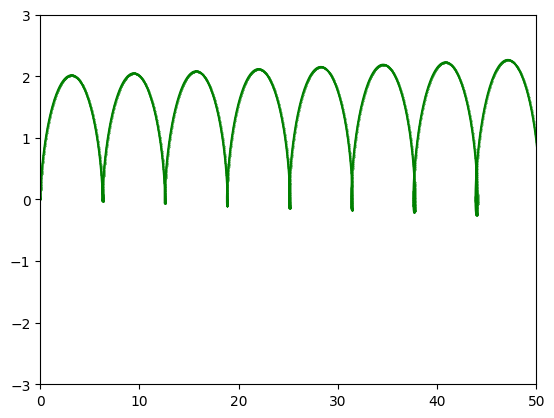

In [3]:
import numpy as np

def acceleration_function(vx_euler, vy_euler, E, B, c, m, i) :
    ax= (c/m)*(vy_euler[i - 1]*B)
    ay= (c/m)*(E-(vx_euler[i - 1]*B))
    
    return ax,ay    

# Implement Euler's first-order scheme
def euler_method_forward(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)
    
    # Time integration loop
    for i in range(1, num_steps):
        ax, ay = acceleration_function(vx_euler, vy_euler, E, B, c, m, i)
        
        # Update velocities and positions using Euler's method
        x_i=x_euler[i - 1]
        y_i=y_euler[i - 1]
        
        v_xi=vx_euler[i - 1]
        v_yi=vy_euler[i - 1]
        
        vx_euler[i]=v_xi+(ax)*dt
        vy_euler[i]=v_yi+(ay)*dt

        x_euler[i]=x_i+(v_xi*dt)+( (1/2)*(ax*(dt**2)) )
        y_euler[i]=y_i+(v_yi*dt)+( (1/2)*(ay*(dt**2)) )

    return x_euler, y_euler

x_euler2, y_euler2 =euler_method_forward(dt, num_steps, acceleration_function)

import matplotlib.pyplot as plt

# Plot the trajectories
plt.plot(x_euler2,y_euler2, color='green', marker="o",  markersize=0.2)
#plt.scatter(PX,PY,size=1)

x=50
y=3

plt.xlim((0,x))

#plt.xlim((-x,x))   # set the xlim to left, right 
plt.ylim((-y,y))
#plt.ylim((0,y))
plt.show()

plt.show()

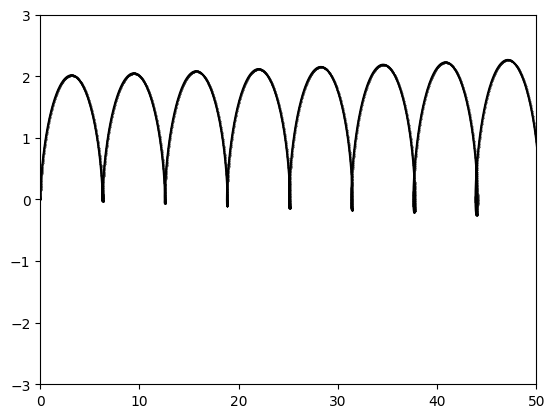

In [4]:
import numpy as np

def acceleration_function(vx_euler, vy_euler, E, B, c, m, i) :
    ax= (c/m)*(vy_euler[i-1]*B)
    ay= (c/m)*(E-(vx_euler[i-1]*B))
    
    return ax,ay    

# Implement Euler's first-order scheme
def euler_method_forward(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)
    
    # Time integration loop
    for i in range(1, num_steps):
        ax, ay = acceleration_function(vx_euler, vy_euler, E, B, c, m, i)
        
        # Update velocities and positions using Euler's method
        x_i=x_euler[i - 1]
        y_i=y_euler[i - 1]
        
        v_xi=vx_euler[i-1]
        v_yi=vy_euler[i-1]
        
        vx_euler[i]=v_xi+(ax)*dt
        vy_euler[i]=v_yi+(ay)*dt
        
        v_xi=vx_euler[i]
        v_yi=vy_euler[i]

        x_euler[i]=x_i+(v_xi*dt)
        y_euler[i]=y_i+(v_yi*dt)

    return x_euler, y_euler

x_euler3, y_euler3 =euler_method_forward(dt, num_steps, acceleration_function)

import matplotlib.pyplot as plt

# Plot the trajectories
plt.plot(x_euler3,y_euler3, color='black', marker="o",  markersize=0.2)
#plt.scatter(PX,PY,size=1)

x=50
y=3

plt.xlim((0,x))

#plt.xlim((-x,x))   # set the xlim to left, right 
plt.ylim((-y,y))
#plt.ylim((0,y))
plt.show()

plt.show()

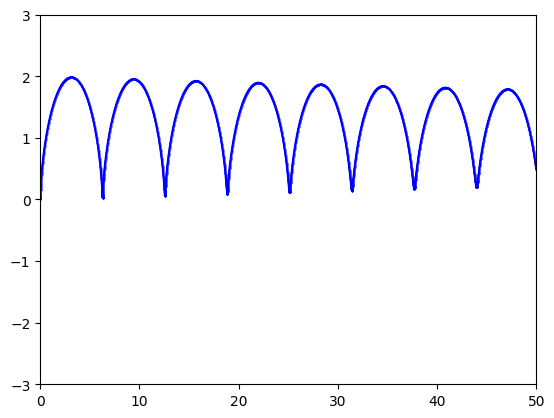

In [5]:
import numpy as np

def velocities_function(vx_euler, vy_euler, E, B, c, m, i, dt) :
    v_fx= ((dt*(c/m)*B)*(vy_euler[i-1]+(dt*(c/m)*E)) + vx_euler[i-1]) / (1+ ((c/m)*dt*B)**2)
    v_fy= (((c/m)*dt*E) - ((c/m)*dt*B*vx_euler[i-1]) + (vy_euler[i-1])) / (1+ ((c/m)*dt*B)**2)
    
    return v_fx,v_fy   

# Implement Euler's first-order scheme
def euler_method_blackward(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)
    
    # Time integration loop
    for i in range(1, num_steps):
        v_fx,v_fy = velocities_function(vx_euler, vy_euler, E, B, c, m, i, dt)
        
        # Update velocities and positions using Euler's method
        x_i=x_euler[i - 1]
        y_i=y_euler[i - 1]
        
        vx_euler[i]=v_fx
        vy_euler[i]=v_fy
        
        v_xi=vx_euler[i]
        v_yi=vy_euler[i]

        x_euler[i]=x_i+(v_xi*dt)
        y_euler[i]=y_i+(v_yi*dt)

    return x_euler, y_euler

x_euler4, y_euler4 =euler_method_blackward(dt, num_steps, acceleration_function)

import matplotlib.pyplot as plt

# Plot the trajectories
plt.plot(x_euler4,y_euler4, color='blue', marker="o",  markersize=0.2)
#plt.scatter(PX,PY,size=1)

x=50
y=3

plt.xlim((0,x))

#plt.xlim((-x,x))   # set the xlim to left, right 
plt.ylim((-y,y))
#plt.ylim((0,y))
plt.show()

plt.show()

### Simulation and Visualization
Let's simulate the projectile motion using Euler's first-order scheme and visualize the trajectory.

### Plot Euler Trajectory

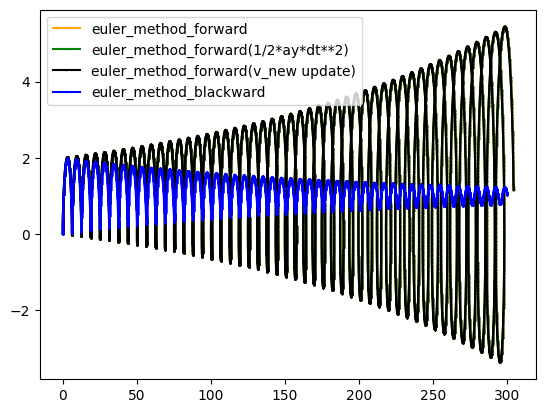

In [6]:
plt.plot(x_euler,y_euler, color='orange', marker="o",  markersize=0.2, label = "euler_method_forward")
plt.plot(x_euler2,y_euler2, color='green', marker="o",  markersize=0.2, label = "euler_method_forward(1/2*ay*dt**2)")
plt.plot(x_euler3,y_euler3, color='black', marker="o",  markersize=0.2, label = "euler_method_forward(v_new update)")
plt.plot(x_euler4,y_euler4, color='blue', marker="o",  markersize=0.2, label = "euler_method_blackward")

x=50
y=3

#plt.xlim((0,x))
#plt.xlim((-x,x))   # set the xlim to left, right 
#plt.ylim((-y,y))
#plt.ylim((0,y))

#plt.xlim((300,310))
plt.legend() #show label
plt.show() #show grahp

## Leapfrog Method

The leapfrog method is a second-order implicit time integration technique commonly used for conservative systems. It updates positions and velocities at alternating time steps, leading to improved accuracy and energy conservation.

For an ODE,

$$
\dfrac{d y}{d t} = f(y(t),t)
$$

We write

$$
\dfrac{y_\text{new} - y_\text{old}}{\Delta t} = f((y_\text{new} + y_\text{old})/2, t)
$$

where $y_\text{new} = y(t+\Delta t/2)$, and $y_\text{old} = y(t-\Delta t/2)$. This is an implicit equation for $y_\text{new}$, but it can be solved by iteration.

If we define angular cyclotron frequency vector $\mathbf{\Omega} = q\mathbf{B}/m$ and normalized electric field $\mathbf{\Sigma} = q\mathbf{E}/m$, then the Lorentz force becomes

$$
\dfrac{dv}{dt} = \mathbf{\Omega} \times \mathbf{v} + \mathbf{\Sigma}
$$

Show that the implitcit leapfrog method gives

$$
v_\text{new} + \mathbf{A} \times v_\text{new} = \mathbf{C}
$$

where $\mathbf{A} = \mathbf{\Omega} \Delta t/2$ and $\mathbf{C} = v_\text{old} + \Delta t (\mathbf{\Sigma}  + v_\text{old} \times \mathbf{\Omega}/2)$.

Show that we can solve for $v_\text{new}$ by iteration using

$$
v_\text{new} = \dfrac{\mathbf{C} + \mathbf{A} \mathbf{A} \cdot \mathbf{C} - \mathbf{A} \times \mathbf{C}}{1+ A^2}
$$

Then update the new position using
$$
x_\text{new} = x_\text{old} + v_\text{new} \Delta t 
$$

For our cross-fields $\mathbf{E} = E_y \hat{j}$ and $\mathbf{B} = B_z \hat{k}$, show that we can update the new velocities $(v_x',v_y')$ from the old one $(v_x,v_y)$ using

\begin{align*}
v_x' &= \dfrac{v_x + v_y \Omega \Delta t}{1+(\Omega \Delta t/2)^2} \\
v_y' &= \dfrac{v_y - v_x \Omega \Delta t + \Sigma \Delta t}{1+(\Omega \Delta t/2)^2} \\ 
\end{align*}

### Implementation
Let's implement the leapfrog method for simulating the projectile motion in a constant electromagnetic field.

In [7]:
import numpy as np
# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees
c=1
m=1

# field parameters
E = 1
B = 1

# Time step size for the simulation
dt = 0.01  # seconds

tmax=300

# Number of time steps to simulate
num_steps = int(tmax/dt)

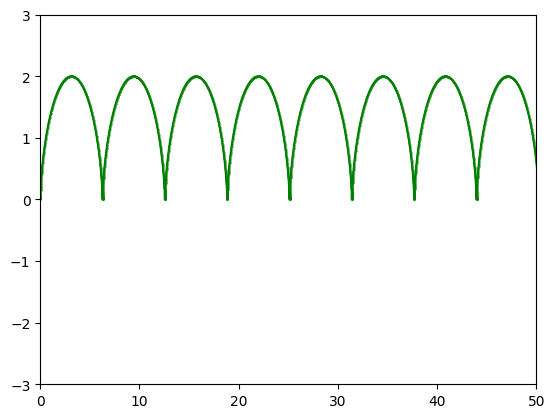

In [8]:
import numpy as np

def acceleration_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i) :
    axp= (c/m)*(vy_leapfrog[i - 1]*B)
    ayp= (c/m)*(E-(vx_leapfrog[i - 1]*B))

    return axp, ayp

def leapfrog_method_Explicit(dt, num_steps, E, B, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_leapfrog = np.zeros(num_steps)
    y_leapfrog = np.zeros(num_steps)
    vx_leapfrog = np.zeros(num_steps)
    vy_leapfrog = np.zeros(num_steps)
    
    # Initial conditions
    x_leapfrog[0] = x0
    y_leapfrog[0] = y0
    vx_leapfrog[0] = initial_velocity * np.cos(initial_angle)
    vy_leapfrog[0] = initial_velocity * np.sin(initial_angle)
    
    # nommalized fields
    #sigma = q_m * E
    #omega = q_m * B

    # Time integration loop leapfrog Explicit from
    for i in range(1, num_steps):
        
        axp, ayp= acceleration_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i)
        
        # Update velocities using leapfrog method (half time-step)
        vxp= vx_leapfrog[i-1] + (axp*dt)
        vyp= vy_leapfrog[i-1] + (ayp*dt)
        
        #xp= x_leapfrog[i-1] + (vxp*dt)
        #yp= y_leapfrog[i-1] + (vyp*dt)
        
        axb= (c/m)*(vyp*B)
        ayb= (c/m)*(E-(vxp*B))
        
        vxf= vxp
        vyf= vyp
        
        vxb= vx_leapfrog[i-1] + (axb*dt)
        vyb= vy_leapfrog[i-1] + (ayb*dt)
        
        vx_leapfrog[i] = (vxb+vxf)/2
        vy_leapfrog[i] = (vyb+vyf)/2
        
        # Update positions using updated velocities
        
        x_leapfrog[i]= x_leapfrog[i-1] + (vx_leapfrog[i])*dt
        y_leapfrog[i]= y_leapfrog[i-1] + (vy_leapfrog[i])*dt
    
    return x_leapfrog, y_leapfrog

x_leapfrog, y_leapfrog = leapfrog_method_Explicit(dt, num_steps, E, B, acceleration_function)

import matplotlib.pyplot as plt

# Plot the trajectories
plt.plot(x_leapfrog, y_leapfrog, color='green', marker="o",  markersize=0.2)

x=50
y=3

plt.xlim((0,x))

#plt.xlim((-x,x))   # set the xlim to left, right 
plt.ylim((-y,y)) 

plt.show()

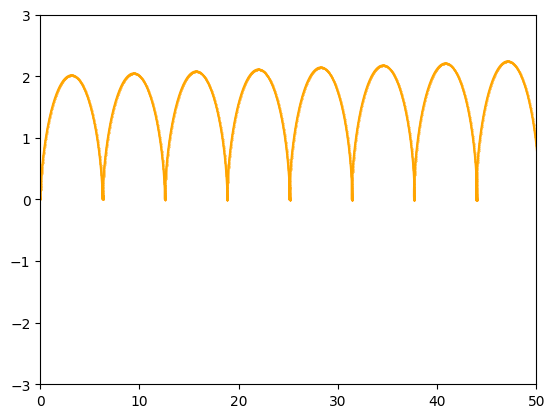

In [9]:
import numpy as np

def velocities_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i, dt) :
    v_fx= ( ((dt*(c*B/m))*vy_leapfrog[i-1]) + vx_leapfrog[i-1] ) / (1+ (c*B*dt/(m*2))**2)
    v_fy= ( ((c*E/m)*dt) - ((c*B/m)*dt*vx_leapfrog[i-1]) + (vy_leapfrog[i-1]) ) / (1+ (c*B*dt/(m*2))**2)
    
    return v_fx,v_fy   

def leapfrog_method_implicit(dt, num_steps, E, B, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_leapfrog = np.zeros(num_steps)
    y_leapfrog = np.zeros(num_steps)
    vx_leapfrog = np.zeros(num_steps)
    vy_leapfrog = np.zeros(num_steps)
    
    # Initial conditions
    x_leapfrog[0] = x0
    y_leapfrog[0] = y0
    vx_leapfrog[0] = initial_velocity * np.cos(initial_angle)
    vy_leapfrog[0] = initial_velocity * np.sin(initial_angle)
    
    # nommalized fields
    #sigma = q_m * E
    #omega = q_m * B

    # Time integration loop leapfrog Implicit from
    for i in range(1, num_steps):
        
        v_fx,v_fy = velocities_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i, dt)
        
        # Update velocities using leapfrog method (half time-step)
        
        vx_leapfrog[i]=v_fx
        vy_leapfrog[i]=v_fy
        
        v_xi=vx_leapfrog[i]
        v_yi=vy_leapfrog[i]
        
        # Update positions using updated velocities
        
        x_i=x_leapfrog[i - 1]
        y_i=y_leapfrog[i - 1]
        
        x_leapfrog[i]=x_i+(v_xi*dt)
        y_leapfrog[i]=y_i+(v_yi*dt)
    
    return x_leapfrog, y_leapfrog

x_leapfrog2, y_leapfrog2 = leapfrog_method_implicit(dt, num_steps, E, B, acceleration_function)

import matplotlib.pyplot as plt

# Plot the trajectories
plt.plot(x_leapfrog2, y_leapfrog2, color='orange', marker="o",  markersize=0.2)

x=50
y=3

plt.xlim((0,x))

#plt.xlim((-x,x))   # set the xlim to left, right 
plt.ylim((-y,y)) 
plt.show()

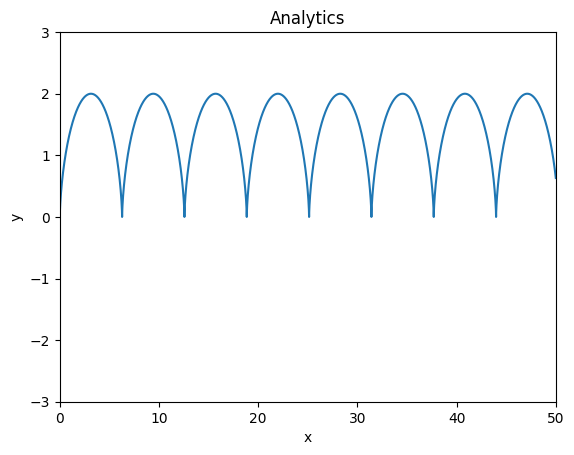

In [10]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,tmax,num_steps)
c=1
m=1
E=1
B=1
def f(t):
    x= ( (m*E/(c*B**2)) )*( (c*B/m)*t - np.sin((c*B/m)*t) )
    y= ( (m*E/(c*B**2)) )*( 1 - np.cos((c*B/m)*t) )
    return x,y

x_a,y_a=f(t)

# Plot the solution
plt.plot(x_a, y_a)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Analytics')

x=50
y=3
plt.xlim((0,x))
#plt.xlim((-x,x))   # set the xlim to left, right 
plt.ylim((-y,y))

plt.show()  

### Plot Leapfrog

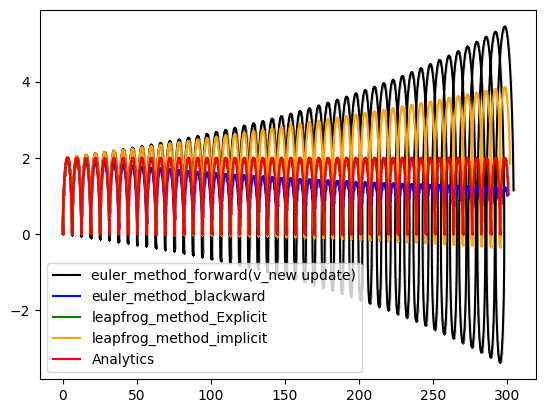

In [11]:
plt.plot(x_euler3,y_euler3, color='black', marker=".",  markersize=0.1, label = "euler_method_forward(v_new update)")
plt.plot(x_euler4,y_euler4, color='blue', marker=".",  markersize=0.1, label = "euler_method_blackward")
plt.plot(x_leapfrog, y_leapfrog, color='green', marker=".",  markersize=0.1, label = "leapfrog_method_Explicit")
plt.plot(x_leapfrog2, y_leapfrog2, color='orange', marker=".",  markersize=0.1, label = "leapfrog_method_implicit")
plt.plot(x_a, y_a, color='red', marker=".",  markersize=0.1, label = "Analytics")

x=50
y=3

#plt.xlim((0,x))
#plt.xlim((-x,x))   # set the xlim to left, right 
#plt.ylim((-y,y))
#plt.ylim((0,y))

#plt.xlim((900,910))
plt.legend()
plt.show()

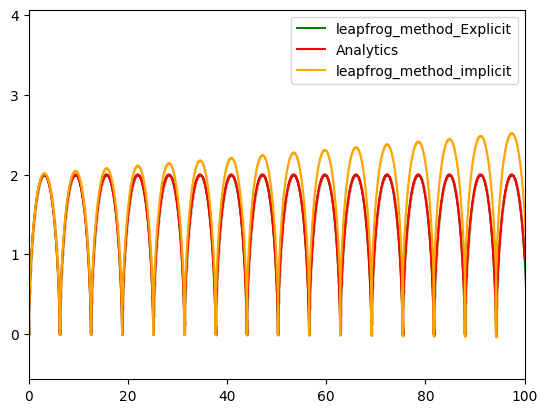

In [12]:
plt.plot(x_leapfrog, y_leapfrog, color='green', marker=".",  markersize=0.1, label = "leapfrog_method_Explicit")
plt.plot(x_a, y_a, color='red', marker=".",  markersize=0.1, label = "Analytics")
plt.plot(x_leapfrog2, y_leapfrog2, color='orange', marker=".",  markersize=0.1, label = "leapfrog_method_implicit")


x=100
y=3

plt.xlim((0,x))
#plt.xlim((-x,x))   # set the xlim to left, right 
#plt.ylim((-y,y))
#plt.ylim((0,y))

#plt.xlim((900,910))
plt.legend()
plt.show()

# Runge-Kutta 4 Method

The Runge-Kutta method is a popular time integration technique for solving ordinary differential equations. It is an explicit method that is easy to implement and computationally efficient. The fourth-order Runge-Kutta method (RK4) is one of the most widely used Runge-Kutta methods. It is a higher-order method that offers better accuracy than the Euler's method.

The RK4 method involves breaking down the ODE into a series of smaller steps and iteratively calculating the next step based on the current step's information. It uses four intermediate estimates to improve accuracy, making it a higher-order method compared to simpler techniques like Euler's method.

### Steps
1. Given an initial value and an ODE, you start with an initial point.
2. Calculate the values of the ODE at the initial point.
3. Use these values to estimate the function's behavior over a small time interval.
4. Calculate four intermediate estimates of the function using the initial point and the estimated behavior.
5. Combine these intermediate estimates to compute the weighted average, which becomes the next point's value.
6. Repeat these steps to move iteratively along the solution curve of the ODE.

### Implementation

For a given timestep $h = \Delta t$, the RK4 method can be implemented as follows:

$$ \begin{aligned} & k_1 = h f(t_n, y_n) \\ & k_2 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_1}{2} \right) \\ & k_3 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_2}{2} \right) \\ & k_4 = h f(t_n + h, y_n + k_3) \\ & y_{n+1} = y_n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6} \end{aligned}$$            

# Analytics

For this simple cross-fields, we can solve the Lorentz equations analytically.  We have a cycloid motion with the following parametric equations

$$
x(t) = R (\omega t - \sin \omega t)
$$

$$
y(t) = R (1- \cos \omega t)
$$

where $\omega = \frac{qB}{m}$ and $R = \frac{m E}{q B^2}$.

In [13]:
import numpy as np
# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees
c=1
m=1

# field parameters
E = 1
B = 1

# Time step size for the simulation
dt = 0.01  # seconds

tmax=100

# Number of time steps to simulate
num_steps = int(tmax/dt)

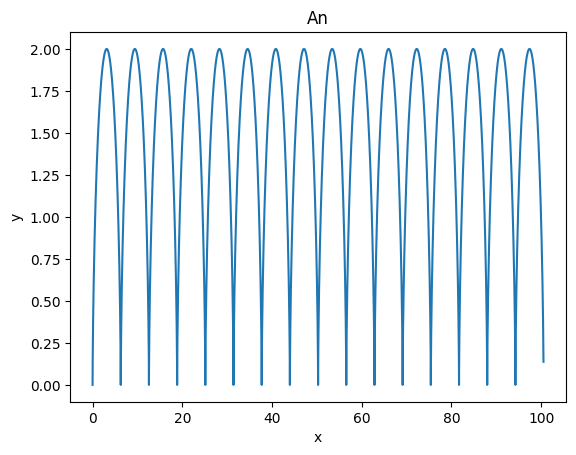

In [14]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,tmax,num_steps)
c=1
m=1
E=1
B=1
def f(t):
    x= ( (m*E/(c*B**2)) )*( (c*B/m)*t - np.sin((c*B/m)*t) )
    y= ( (m*E/(c*B**2)) )*( 1 - np.cos((c*B/m)*t) )
    return x,y

x,y=f(t)

# Plot the solution
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('An')
plt.show()  

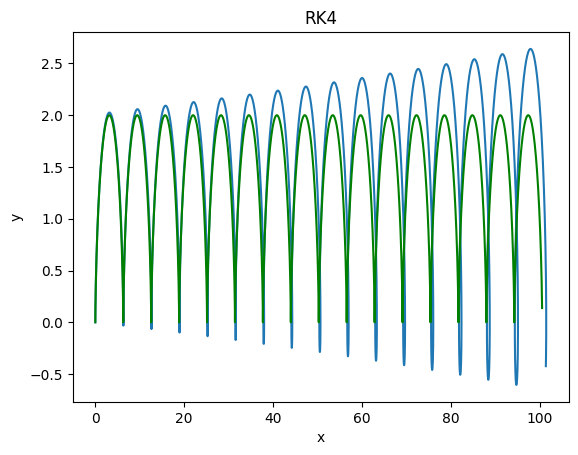

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def fx(dt, vx_RK4, vy_RK4, i, c, m, B):
    vx=vx_RK4[i-1]+( (c/m)*(vy_RK4[i - 1]*B)*(dt) )
    return vx

def fy(dt, vx_RK4, vy_RK4, i, c, m, E, B):
    vy=vy_RK4[i-1]+( (c/m)*(E-(vx_RK4[i - 1]*B))*(dt) )
    return vy

def rk4_x(dt, x_RK4, vx_RK4, vy_RK4, fx, i, c, m, B):
    k1 = dt * vx_RK4[i-1]
    k2 = dt * fx(1.5*dt, vx_RK4+(0.5*k1), vy_RK4+(0.5*k1), i, c, m, B)
    k3 = dt * fx(1.5*dt, vx_RK4+(0.5*k2), vy_RK4+(0.5*k2), i, c, m, B)
    k4 = dt * fx(2*dt, vx_RK4+k3, vy_RK4+k3, i, c, m, B)
    return x_RK4[i-1] + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

def rk4_y(dt, y_RK4, vx_RK4, vy_RK4, fy, i, c, m, E, B):
    k1 = dt * vy_RK4[i-1]
    k2 = dt * fy(1.5*dt, vx_RK4+(0.5*k1), vy_RK4+(0.5*k1), i, c, m, E, B)
    k3 = dt * fy(1.5*dt, vx_RK4+(0.5*k2), vy_RK4+(0.5*k2), i, c, m, E, B)
    k4 = dt * fy(2*dt, vx_RK4+k3, vy_RK4+k3, i, c, m, E, B)
    return y_RK4[i-1] + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

def rk4_step(dt, num_steps, c, m, E, B, fx, fy, rk4_x, rk4_y):

    # Initialize arrays to store positions and velocities
    t_RK4 = np.zeros(num_steps)
    x_RK4 = np.zeros(num_steps)
    y_RK4 = np.zeros(num_steps)
    vx_RK4 = np.zeros(num_steps)
    vy_RK4 = np.zeros(num_steps)
    
    vxp = np.zeros(num_steps)
    vyp = np.zeros(num_steps)

    # Initial conditions
    t=0
    x_RK4[0] = x0
    y_RK4[0] = y0
    vx_RK4[0] = initial_velocity * np.cos(initial_angle)
    vy_RK4[0] = initial_velocity * np.sin(initial_angle)

    # Time integration loop fourth-order Runge-Kutta
    for i in range(1, num_steps):
        y_RK4[i] = rk4_y(dt, y_RK4, vx_RK4, vy_RK4, fy, i, c, m, E, B)
        x_RK4[i] = rk4_x(dt, x_RK4, vx_RK4, vy_RK4, fx, i, c, m, B) 
        vx_RK4[i] = fx(dt, vx_RK4, vy_RK4, i, c, m, B)
        vy_RK4[i] = fy(dt, vx_RK4, vy_RK4, i, c, m, E, B)
        t_RK4[i] = t_RK4[i-1]+dt
    return x_RK4,y_RK4,vx_RK4,vy_RK4,t_RK4

# Use the fourth-order Runge-Kutta method to solve the differential equation
x_RK4,y_RK4,vx_RK4,vy_RK4,t_RK4=rk4_step(dt, num_steps, c, m, E, B, fx, fy, rk4_x, rk4_y)

# Plot the solution
plt.plot(x_RK4, y_RK4)
plt.plot(x, y,'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4')
plt.show()

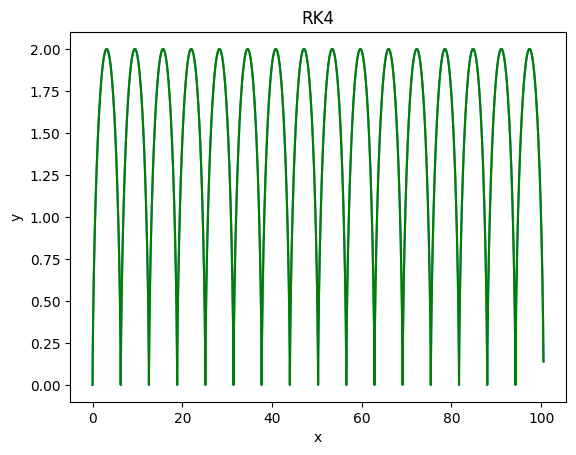

In [16]:
import numpy as np
import matplotlib.pyplot as plt

O = c*B/m
R = m*E/(c*B**2)

# Define the differential equation
def fx(t, O, R):
    vx=R*( O-(O*np.cos(O*t)) )
    return vx

def fy(t, O, R):
    vy=R*O*np.sin(O*t)
    return vy

def rk4_x(dt, x_RK4, t, O, R, fx, i):
    k1 = dt * fx(t, O, R)
    k2 = dt * fx(t+(0.5*dt), O, R)
    k3 = dt * fx(t+(0.5*dt), O, R)
    k4 = dt * fx(t+dt, O, R)
    
    return x_RK4[i-1] + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

def rk4_y(dt, y_RK4, t, O, R, fy, i):
    k1 = dt * fy(t, O, R)
    k2 = dt * fy(t+(0.5*dt), O, R)
    k3 = dt * fy(t+(0.5*dt), O, R)
    k4 = dt * fy(t+dt, O, R)
    return y_RK4[i-1] + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

def rk4_step(dt, num_steps, O, R, fx, fy, rk4_x, rk4_y):

    # Initialize arrays to store positions and velocities
    t_RK4 = np.zeros(num_steps)
    x_RK4 = np.zeros(num_steps)
    y_RK4 = np.zeros(num_steps)
    vx_RK4 = np.zeros(num_steps)
    vy_RK4 = np.zeros(num_steps)
    
    vxp = np.zeros(num_steps)
    vyp = np.zeros(num_steps)

    # Initial conditions
    x_RK4[0] = x0
    y_RK4[0] = y0
    vx_RK4[0] = 0
    vy_RK4[0] = 0

    # Time integration loop fourth-order Runge-Kutta
    for i in range(1, num_steps):
        t        = t_RK4[i-1]
        t_RK4[i] = t_RK4[i-1]+dt
        x_RK4[i] = rk4_x(dt, x_RK4, t, O, R, fx, i)
        y_RK4[i] = rk4_y(dt, y_RK4, t, O, R, fy, i) 
        vx_RK4[i] = fx(t, O, R)
        vy_RK4[i] = fy(t, O, R)
    return x_RK4,y_RK4,vx_RK4,vy_RK4,t_RK4

# Use the fourth-order Runge-Kutta method to solve the differential equation
x_RK4_2,y_RK4_2,vx_RK4_2,vy_RK4_2,t_RK4_2=rk4_step(dt, num_steps, O, R, fx, fy, rk4_x, rk4_y)

# Plot the solution
plt.plot(x_RK4_2, y_RK4_2)
plt.plot(x, y,'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4')
plt.show()

$$
                            a_x = \frac{q}{m}(v_yB) \ , \ a_y = \frac{q}{m}(E-v_xB) \\
                \frac{dv_x}{dt} = \frac{q}{m}(v_yB) \ , \ \frac{dv_y}{dt} = \frac{q}{m}(E-v_xB) \\
\frac{d^2 v_x}{dt^2} = \frac{qB}{m}(\frac{dv_y}{dt}) \ , \ \frac{d^2 v_y}{dt^2} = \frac{q}{m}(E-B\frac{dv_x}{dt}) \\
\frac{d^2 v_x}{dt^2} = \frac{qB}{m}(\frac{q}{m}(E-v_xB)) \ , \ \frac{d^2 v_y}{dt^2} = \frac{q}{m}(E-B\frac{q}{m}(v_yB)) \\
\frac{d^2 v_x}{dt^2} = (\frac{qB}{m})^2(\frac{E}{B}-v_x) \ , \ \frac{d^2 v_y}{dt^2} = (\frac{qB}{m})^2(\frac{m}{qB^2} E-v_y) \\
$$

# Exercises

From all the above, we have the following methods to compare
- Euler
- Leap-frog
- RK4
- Theory

### Tasks

1. Plot all the paths.
2. Find the error in each method as a function of timesteps. The error could be defined as the difference between the numerical and analytical solutions.

The errors could be defined using the $p$-norm.

$$
\epsilon = \left( \sum_i^n |x_{i,\text{numerical}} - x_{i,\text{analytic}}|^p \right)^{1/p}
$$

where $x_i$ is the numerical solution and $x_{i,exact}$ is the analytical solution.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees
c=1
m=1

# field parameters
E = 1
B = 1

# Time step size for the simulation
dt = 0.001  # seconds

tmax=100

# Number of time steps to simulate
num_steps = int(tmax/dt)

def error(Ax, Sx, Ay, Sy):
    E=np.zeros(num_steps)
    for i in range(0,num_steps):
        Ex = np.abs(Sx[i]-Ax[i])
        Ey = np.abs(Sy[i]-Ay[i])
        E[i]  = (Ex+Ey)/2
    return E

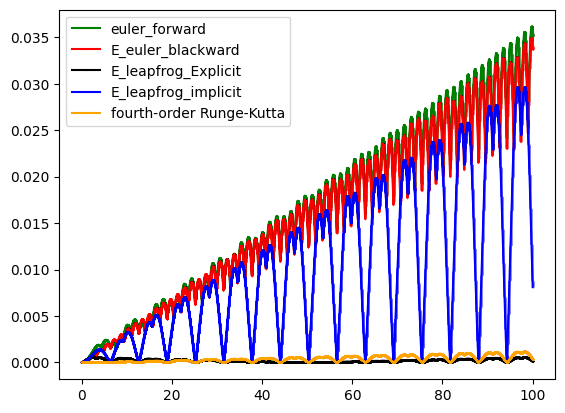

In [18]:
##Analytic
t_A = np.linspace(0,tmax,num_steps)
c=1
m=1
E=1
B=1
def f(t):
    x= ( (m*E/(c*B**2)) )*( (c*B/m)*t - np.sin((c*B/m)*t) )
    y= ( (m*E/(c*B**2)) )*( 1 - np.cos((c*B/m)*t) )
    return x,y

x,y=f(t_A)

##euler_method_forward
def acceleration_function(vx_euler, vy_euler, E, B, c, m, i) :
    ax= (c/m)*(vy_euler[i-1]*B)
    ay= (c/m)*(E-(vx_euler[i-1]*B))
    
    return ax,ay    

# Implement Euler's first-order scheme
def euler_method_forward(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)
    
    # Time integration loop
    for i in range(1, num_steps):
        ax, ay = acceleration_function(vx_euler, vy_euler, E, B, c, m, i)
        
        # Update velocities and positions using Euler's method
        x_i=x_euler[i - 1]
        y_i=y_euler[i - 1]
        
        v_xi=vx_euler[i-1]
        v_yi=vy_euler[i-1]
        
        vx_euler[i]=v_xi+(ax)*dt
        vy_euler[i]=v_yi+(ay)*dt
        
        v_xi=vx_euler[i]
        v_yi=vy_euler[i]

        x_euler[i]=x_i+(v_xi*dt)
        y_euler[i]=y_i+(v_yi*dt)

    return x_euler, y_euler

x_euler3, y_euler3 =euler_method_forward(dt, num_steps, acceleration_function)

E_euler_forward = error(x_euler3, x, y_euler3, y)

##euler_method_blackward
def velocities_function(vx_euler, vy_euler, E, B, c, m, i, dt) :
    v_fx= ((dt*(c/m)*B)*(vy_euler[i-1]+(dt*(c/m)*E)) + vx_euler[i-1]) / (1+ ((c/m)*dt*B)**2)
    v_fy= (((c/m)*dt*E) - ((c/m)*dt*B*vx_euler[i-1]) + (vy_euler[i-1])) / (1+ ((c/m)*dt*B)**2)
    
    return v_fx,v_fy   

# Implement Euler's first-order scheme
def euler_method_blackward(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)
    
    # Time integration loop
    for i in range(1, num_steps):
        v_fx,v_fy = velocities_function(vx_euler, vy_euler, E, B, c, m, i, dt)
        
        # Update velocities and positions using Euler's method
        x_i=x_euler[i - 1]
        y_i=y_euler[i - 1]
        
        vx_euler[i]=v_fx
        vy_euler[i]=v_fy
        
        v_xi=vx_euler[i]
        v_yi=vy_euler[i]

        x_euler[i]=x_i+(v_xi*dt)
        y_euler[i]=y_i+(v_yi*dt)

    return x_euler, y_euler

x_euler4, y_euler4 =euler_method_blackward(dt, num_steps, acceleration_function)

E_euler_blackward = error(x_euler4, x, y_euler4, y)

##leapfrog_method_Explicit
def acceleration_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i) :
    axp= (c/m)*(vy_leapfrog[i - 1]*B)
    ayp= (c/m)*(E-(vx_leapfrog[i - 1]*B))

    return axp, ayp

def leapfrog_method_Explicit(dt, num_steps, E, B, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_leapfrog = np.zeros(num_steps)
    y_leapfrog = np.zeros(num_steps)
    vx_leapfrog = np.zeros(num_steps)
    vy_leapfrog = np.zeros(num_steps)
    
    # Initial conditions
    x_leapfrog[0] = x0
    y_leapfrog[0] = y0
    vx_leapfrog[0] = initial_velocity * np.cos(initial_angle)
    vy_leapfrog[0] = initial_velocity * np.sin(initial_angle)
    
    # nommalized fields
    #sigma = q_m * E
    #omega = q_m * B

    # Time integration loop leapfrog Explicit from
    for i in range(1, num_steps):
        
        axp, ayp= acceleration_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i)
        
        # Update velocities using leapfrog method (half time-step)
        vxp= vx_leapfrog[i-1] + (axp*dt)
        vyp= vy_leapfrog[i-1] + (ayp*dt)
        
        #xp= x_leapfrog[i-1] + (vxp*dt)
        #yp= y_leapfrog[i-1] + (vyp*dt)
        
        axb= (c/m)*(vyp*B)
        ayb= (c/m)*(E-(vxp*B))
        
        vxf= vxp
        vyf= vyp
        
        vxb= vx_leapfrog[i-1] + (axb*dt)
        vyb= vy_leapfrog[i-1] + (ayb*dt)
        
        vx_leapfrog[i] = (vxb+vxf)/2
        vy_leapfrog[i] = (vyb+vyf)/2
        
        # Update positions using updated velocities
        
        x_leapfrog[i]= x_leapfrog[i-1] + (vx_leapfrog[i])*dt
        y_leapfrog[i]= y_leapfrog[i-1] + (vy_leapfrog[i])*dt
    
    return x_leapfrog, y_leapfrog

x_leapfrog, y_leapfrog = leapfrog_method_Explicit(dt, num_steps, E, B, acceleration_function)

E_leapfrog_Explicit = error(x_leapfrog, x, y_leapfrog, y)

##leapfrog_method_implicit
def velocities_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i, dt) :
    v_fx= ( ((dt*(c/m)*B)*vy_leapfrog[i-1]) + vx_leapfrog[i-1] ) / (1+ ((c/m)*(dt/2)*B)**2)
    v_fy= ( ((c/m)*dt*E) - ((c/m)*dt*B*vx_leapfrog[i-1]) + (vy_leapfrog[i-1]) ) / (1+ ((c/m)*(dt/2)*B)**2)
    
    return v_fx,v_fy   

def leapfrog_method_implicit(dt, num_steps, E, B, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_leapfrog = np.zeros(num_steps)
    y_leapfrog = np.zeros(num_steps)
    vx_leapfrog = np.zeros(num_steps)
    vy_leapfrog = np.zeros(num_steps)
    
    # Initial conditions
    x_leapfrog[0] = x0
    y_leapfrog[0] = y0
    vx_leapfrog[0] = initial_velocity * np.cos(initial_angle)
    vy_leapfrog[0] = initial_velocity * np.sin(initial_angle)
    
    # nommalized fields
    #sigma = q_m * E
    #omega = q_m * B

    # Time integration loop leapfrog Implicit from
    for i in range(1, num_steps):
        
        v_fx,v_fy = velocities_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i, dt)
        
        # Update velocities using leapfrog method (half time-step)
        
        vx_leapfrog[i]=v_fx
        vy_leapfrog[i]=v_fy
        
        v_xi=vx_leapfrog[i]
        v_yi=vy_leapfrog[i]
        
        # Update positions using updated velocities
        
        x_i=x_leapfrog[i - 1]
        y_i=y_leapfrog[i - 1]
        
        x_leapfrog[i]=x_i+(v_xi*dt)
        y_leapfrog[i]=y_i+(v_yi*dt)
    
    return x_leapfrog, y_leapfrog

x_leapfrog2, y_leapfrog2 = leapfrog_method_implicit(dt, num_steps, E, B, acceleration_function)

E_leapfrog_implicit = error(x_leapfrog2, x, y_leapfrog2, y)

##fourth-order Runge-Kutta method

O = c*B/m
R = m*E/(c*B**2)

# Define the differential equation
def fx(t, O, R):
    vx=R*( O-(O*np.cos(O*t)) )
    return vx

def fy(t, O, R):
    vy=R*O*np.sin(O*t)
    return vy

def rk4_x(dt, x_RK4, t, O, R, fx, i):
    k1 = dt * fx(t, O, R)
    k2 = dt * fx(t+(0.5*dt), O, R)
    k3 = dt * fx(t+(0.5*dt), O, R)
    k4 = dt * fx(t+dt, O, R)
    
    return x_RK4[i-1] + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

def rk4_y(dt, y_RK4, t, O, R, fy, i):
    k1 = dt * fy(t, O, R)
    k2 = dt * fy(t+(0.5*dt), O, R)
    k3 = dt * fy(t+(0.5*dt), O, R)
    k4 = dt * fy(t+dt, O, R)
    return y_RK4[i-1] + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

def rk4_step(dt, num_steps, O, R, fx, fy, rk4_x, rk4_y):

    # Initialize arrays to store positions and velocities
    t_RK4 = np.zeros(num_steps)
    x_RK4 = np.zeros(num_steps)
    y_RK4 = np.zeros(num_steps)
    vx_RK4 = np.zeros(num_steps)
    vy_RK4 = np.zeros(num_steps)
    
    vxp = np.zeros(num_steps)
    vyp = np.zeros(num_steps)

    # Initial conditions
    x_RK4[0] = x0
    y_RK4[0] = y0
    vx_RK4[0] = 0
    vy_RK4[0] = 0

    # Time integration loop fourth-order Runge-Kutta
    for i in range(1, num_steps):
        t        = t_RK4[i-1]
        t_RK4[i] = t_RK4[i-1]+dt
        x_RK4[i] = rk4_x(dt, x_RK4, t, O, R, fx, i)
        y_RK4[i] = rk4_y(dt, y_RK4, t, O, R, fy, i) 
        vx_RK4[i] = fx(t, O, R)
        vy_RK4[i] = fy(t, O, R)
    return x_RK4,y_RK4,vx_RK4,vy_RK4,t_RK4

# Use the fourth-order Runge-Kutta method to solve the differential equation
x_RK4_2,y_RK4_2,vx_RK4_2,vy_RK4_2,t_RK4_2=rk4_step(dt, num_steps, O, R, fx, fy, rk4_x, rk4_y)

E_rk4 = error(x_RK4_2, x, y_RK4_2, y)

##plot
plt.plot(t_A, E_euler_forward, color='green', marker=".",  markersize=0.1, label = "euler_forward")
plt.plot(t_A, E_euler_blackward, color='red', marker=".",  markersize=0.1, label = "E_euler_blackward")
plt.plot(t_A, E_leapfrog_Explicit, color='black', marker=".",  markersize=0.1, label = "E_leapfrog_Explicit")
plt.plot(t_A, E_leapfrog_implicit, color='blue', marker=".",  markersize=0.1, label = "E_leapfrog_implicit")
plt.plot(t_A, E_rk4, color='orange', marker=".",  markersize=0.1, label = "fourth-order Runge-Kutta")
#plt.loglog(t_A, E_Analytic, color='brown', marker=".",  markersize=0.1, label = "Analytic")

x=100
y=3

#plt.xlim((0,x))
#plt.xlim((-x,x))   # set the xlim to left, right 
#plt.ylim((-y,y))
#plt.ylim((0,y))
#plt.xlim((900,910))

plt.legend()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees
c=1
m=1

# field parameters
E = 1
B = 1

tmax=300

def error(Ax, Sx, Ay, Sy):
    Ex = np.abs(Sx-Ax)
    Ey = np.abs(Sy-Ay)
    E  = (Ex+Ey)/2
    return E

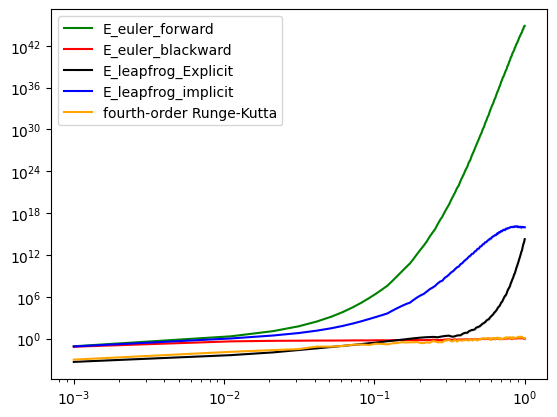

In [20]:
date=100

t= np.linspace(1,0.001,date)

E_euler_forward=[]
E_euler_blackward=[]
E_leapfrog_Explicit=[]
E_leapfrog_implicit=[]
E_rk4=[]

for j in range(0,date):
    # Time step size for the simulation
    dt=t[j]
    
    # Number of time steps to simulate
    num_steps = int(tmax/dt)
    
    ##Analytic
    t_A = tmax

    def f(t):
        x= ( (m*E/(c*B**2)) )*( (c*B/m)*t - np.sin((c*B/m)*t) )
        y= ( (m*E/(c*B**2)) )*( 1 - np.cos((c*B/m)*t) )
        return x,y

    x,y=f(t_A)

    ##euler_method_forward
    def acceleration_function(vx_euler, vy_euler, E, B, c, m, i) :
        ax= (c/m)*(vy_euler*B)
        ay= (c/m)*(E-(vx_euler*B))
        return ax,ay    

    # Implement Euler's first-order scheme
    def euler_method_forward(dt, num_steps, acceleration_function):
        # Initial conditions
        x_euler = x0
        y_euler = y0
        vx_euler = initial_velocity*np.cos(initial_angle)
        vy_euler = initial_velocity*np.sin(initial_angle)
    
        # Time integration loop
        for i in range(1, num_steps):
            ax, ay = acceleration_function(vx_euler, vy_euler, E, B, c, m, i)
        
            # Update velocities and positions using Euler's method
            x_i=x_euler
            y_i=y_euler

            v_xi=vx_euler
            v_yi=vy_euler

            vx_euler=v_xi+(ax)*dt
            vy_euler=v_yi+(ay)*dt

            v_xi=vx_euler
            v_yi=vy_euler

            x_euler=x_i+(v_xi*dt)
            y_euler=y_i+(v_yi*dt)

        return x_euler, y_euler

    x_euler3, y_euler3 =euler_method_forward(dt, num_steps, acceleration_function)

    E_euler_forward.append(error(x_euler3, x, y_euler3, y))
    
    ##euler_method_blackward
    def velocities_function(vx_euler, vy_euler, E, B, c, m, i, dt) :
        v_fx= ((dt*(c/m)*B)*(vy_euler+(dt*(c/m)*E)) + vx_euler) / (1+ ((c/m)*dt*B)**2)
        v_fy= (((c/m)*dt*E) - ((c/m)*dt*B*vx_euler) + (vy_euler)) / (1+ ((c/m)*dt*B)**2)

        return v_fx,v_fy   

    # Implement Euler's first-order scheme
    def euler_method_blackward(dt, num_steps, acceleration_function):
        # Initial conditions
        x_euler = x0
        y_euler = y0
        vx_euler = initial_velocity*np.cos(initial_angle)
        vy_euler = initial_velocity*np.sin(initial_angle)

        # Time integration loop
        for i in range(1, num_steps):
            v_fx,v_fy = velocities_function(vx_euler, vy_euler, E, B, c, m, i, dt)

            # Update velocities and positions using Euler's method
            x_i=x_euler
            y_i=y_euler

            vx_euler=v_fx
            vy_euler=v_fy

            v_xi=vx_euler
            v_yi=vy_euler

            x_euler=x_i+(v_xi*dt)
            y_euler=y_i+(v_yi*dt)

        return x_euler, y_euler

    x_euler4, y_euler4 =euler_method_blackward(dt, num_steps, acceleration_function)

    E_euler_blackward.append(error(x_euler4, x, y_euler4, y))
    
    ##leapfrog_method_Explicit
    def acceleration_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i) :
        axp= (c/m)*(vy_leapfrog*B)
        ayp= (c/m)*(E-(vx_leapfrog*B))

        return axp, ayp

    def leapfrog_method_Explicit(dt, num_steps, E, B, acceleration_function):
        # Initial conditions
        x_leapfrog = x0
        y_leapfrog = y0
        vx_leapfrog = initial_velocity * np.cos(initial_angle)
        vy_leapfrog = initial_velocity * np.sin(initial_angle)

        # nommalized fields
        #sigma = q_m * E
        #omega = q_m * B

        # Time integration loop leapfrog Explicit from
        for i in range(1, num_steps):

            axp, ayp= acceleration_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i)

            # Update velocities using leapfrog method (half time-step)
            vxp= vx_leapfrog + (axp*dt)
            vyp= vy_leapfrog + (ayp*dt)

            #xp= x_leapfrog[i-1] + (vxp*dt)
            #yp= y_leapfrog[i-1] + (vyp*dt)

            axb= (c/m)*(vyp*B)
            ayb= (c/m)*(E-(vxp*B))

            vxf= vxp
            vyf= vyp

            vxb= vx_leapfrog + (axb*dt)
            vyb= vy_leapfrog + (ayb*dt)

            vx_leapfrog = (vxb+vxf)/2
            vy_leapfrog = (vyb+vyf)/2

            # Update positions using updated velocities

            x_leapfrog= x_leapfrog + (vx_leapfrog)*dt
            y_leapfrog= y_leapfrog + (vy_leapfrog)*dt

        return x_leapfrog, y_leapfrog

    x_leapfrog, y_leapfrog = leapfrog_method_Explicit(dt, num_steps, E, B, acceleration_function)

    E_leapfrog_Explicit.append(error(x_leapfrog, x, y_leapfrog, y))

    ##leapfrog_method_implicit
    def velocities_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i, dt) :
        v_fx= ( ((dt*(c/m)*B)*vy_leapfrog) + vx_leapfrog ) / (1+ ((c/m)*(dt/2)*B)**2)
        v_fy= ( ((c/m)*dt*E) - ((c/m)*dt*B*vx_leapfrog) + (vy_leapfrog) ) / (1+ ((c/m)*(dt/2)*B)**2)

        return v_fx,v_fy   

    def leapfrog_method_implicit(dt, num_steps, E, B, acceleration_function):
        # Initial conditions
        x_leapfrog = x0
        y_leapfrog = y0
        vx_leapfrog = initial_velocity * np.cos(initial_angle)
        vy_leapfrog = initial_velocity * np.sin(initial_angle)

        # nommalized fields
        #sigma = q_m * E
        #omega = q_m * B

        # Time integration loop leapfrog Implicit from
        for i in range(1, num_steps):

            v_fx,v_fy = velocities_function(vx_leapfrog, vy_leapfrog, E, B, c, m, i, dt)

            # Update velocities using leapfrog method (half time-step)

            vx_leapfrog=v_fx
            vy_leapfrog=v_fy

            v_xi=vx_leapfrog
            v_yi=vy_leapfrog

            # Update positions using updated velocities

            x_i=x_leapfrog
            y_i=y_leapfrog

            x_leapfrog=x_i+(v_xi*dt)
            y_leapfrog=y_i+(v_yi*dt)

        return x_leapfrog, y_leapfrog

    x_leapfrog2, y_leapfrog2 = leapfrog_method_implicit(dt, num_steps, E, B, acceleration_function)

    E_leapfrog_implicit.append(error(x_leapfrog2, x, y_leapfrog2, y))
    
    ##fourth-order Runge-Kutta method

    O = c*B/m
    R = m*E/(c*B**2)

    # Define the differential equation
    def fx(t, O, R):
        vx=R*( O-(O*np.cos(O*t)) )
        return vx

    def fy(t, O, R):
        vy=R*O*np.sin(O*t)
        return vy

    def rk4_x(dt, x_RK4, t, O, R, fx, i):
        k1 = dt * fx(t, O, R)
        k2 = dt * fx(t+(0.5*dt), O, R)
        k3 = dt * fx(t+(0.5*dt), O, R)
        k4 = dt * fx(t+dt, O, R)

        return x_RK4 + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

    def rk4_y(dt, y_RK4, t, O, R, fy, i):
        k1 = dt * fy(t, O, R)
        k2 = dt * fy(t+(0.5*dt), O, R)
        k3 = dt * fy(t+(0.5*dt), O, R)
        k4 = dt * fy(t+dt, O, R)
        return y_RK4 + ( (k1 + 2*k2 + 2*k3 + k4) / 6 )

    def rk4_step(dt, num_steps, O, R, fx, fy, rk4_x, rk4_y):
        # Initial conditions
        t_RK4 = 0
        x_RK4 = x0
        y_RK4 = y0
        vx_RK4 = 0
        vy_RK4 = 0

        # Time integration loop fourth-order Runge-Kutta
        for i in range(1, num_steps):
            t        = t_RK4
            t_RK4 = t_RK4+dt
            x_RK4 = rk4_x(dt, x_RK4, t, O, R, fx, i)
            y_RK4 = rk4_y(dt, y_RK4, t, O, R, fy, i) 
            vx_RK4 = fx(t, O, R)
            vy_RK4 = fy(t, O, R)
        return x_RK4,y_RK4,vx_RK4,vy_RK4,t_RK4

    # Use the fourth-order Runge-Kutta method to solve the differential equation
    x_RK4_2,y_RK4_2,vx_RK4_2,vy_RK4_2,t_RK4_2=rk4_step(dt, num_steps, O, R, fx, fy, rk4_x, rk4_y)

    E_rk4.append(error(x_RK4_2, x, y_RK4_2, y))

##plot
plt.loglog(t, E_euler_forward, color='green', marker=".",  markersize=0.1, label = "E_euler_forward")
plt.loglog(t, E_euler_blackward, color='red', marker=".",  markersize=0.1, label = "E_euler_blackward")
plt.loglog(t, E_leapfrog_Explicit, color='black', marker=".",  markersize=0.1, label = "E_leapfrog_Explicit")
plt.loglog(t, E_leapfrog_implicit, color='blue', marker=".",  markersize=0.1, label = "E_leapfrog_implicit")
plt.loglog(t, E_rk4, color='orange', marker=".",  markersize=0.1, label = "fourth-order Runge-Kutta")
#plt.loglog(t_A, E_Analytic, color='brown', marker=".",  markersize=0.1, label = "Analytic")

x=1
y=3

#plt.xlim((0,0.01))
#plt.xlim((-x,x))   # set the xlim to left, right 
#plt.ylim((-y,y))
#plt.ylim((0,y))
#plt.xlim((900,910))

plt.legend()
plt.show()

/var/folders/5f/27y1r7hn7fv45c1rp73dcyxc0000gn/T/ipykernel_27550/3272471227.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((0,1))
/var/folders/5f/27y1r7hn7fv45c1rp73dcyxc0000gn/T/ipykernel_27550/3272471227.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,1000))


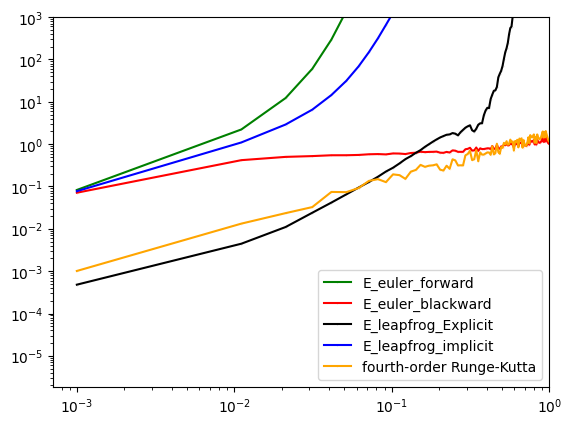

In [21]:
##plot
plt.loglog(t, E_euler_forward, color='green', marker=".",  markersize=0.1, label = "E_euler_forward")
plt.loglog(t, E_euler_blackward, color='red', marker=".",  markersize=0.1, label = "E_euler_blackward")
plt.loglog(t, E_leapfrog_Explicit, color='black', marker=".",  markersize=0.1, label = "E_leapfrog_Explicit")
plt.loglog(t, E_leapfrog_implicit, color='blue', marker=".",  markersize=0.1, label = "E_leapfrog_implicit")
plt.loglog(t, E_rk4, color='orange', marker=".",  markersize=0.1, label = "fourth-order Runge-Kutta")
#plt.loglog(t_A, E_Analytic, color='brown', marker=".",  markersize=0.1, label = "Analytic")

x=1
y=3

plt.xlim((0,1))
#plt.xlim((-x,x))   # set the xlim to left, right 
#plt.ylim((-y,y))
plt.ylim((0,1000))
#plt.xlim((900,910))

plt.legend()
plt.show()